In [1]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')

In [2]:
# define X_train and y_train
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

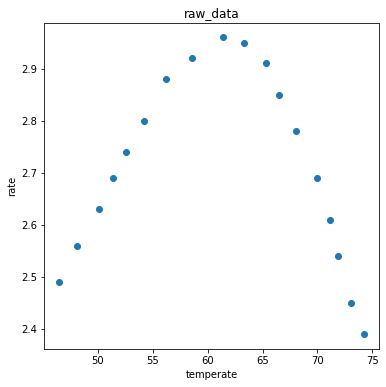

In [3]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(6,6))
plt.scatter(X_train,y_train)
plt.title("raw_data")
plt.xlabel("temperate")
plt.ylabel("rate")
plt.show()

In [4]:
X_train = np.array(X_train).reshape(-1,1)

In [5]:
# 用线性回归模型预测
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [6]:
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test.loc[:,"T"]
y_test = data_test.loc[:,"rate"]

In [7]:
X_test = np.array(X_test).reshape(-1,1)

In [8]:
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
# prtin the  sult 
print(" r2_train:", r2_train)
print("Test r2", r2_test)

 r2_train: 0.016665703886981964
Test r2 -0.758336343735132


In [9]:
# generate new data
X_range = np.linspace(40,90,300).reshape(-1,1)
y_range_predict = lr1.predict(X_range)

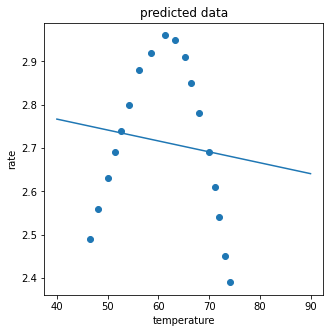

In [10]:
# draw the fig
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_range_predict)
plt.scatter(X_train,y_train)
plt.title("predicted data")
plt.xlabel("temperature")
plt.ylabel("rate")
plt.show()

In [19]:
# 多项模型
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)

poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)

(18, 6)


In [21]:
lr2 = LinearRegression()
lr2.fit(X_2_train,y_train)


y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train,y_2_train_predict)
r2_2_test = r2_score(y_test,y_2_test_predict)

lr5 = LinearRegression()
lr5.fit(X_5_train,y_train)


y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train,y_5_train_predict)
r2_5_test = r2_score(y_test,y_5_test_predict)




print('training r2_2:',r2_2_train)
print('test r2_2:',r2_2_test)
print('training r2_5:',r2_5_train)
print('test r2_5:',r2_5_test)

training r2_2: 0.970051540068943
test r2_2: 0.996395455646867
training r2_5: 0.9978527267142803
test r2_5: 0.543784598216784


In [28]:
# visualize  
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)

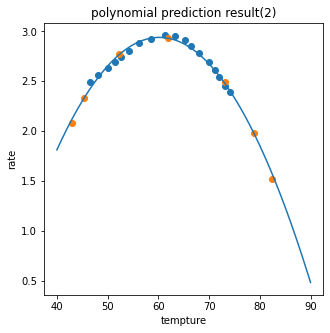

In [30]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_2_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.title('polynomial prediction result(2)')
plt.xlabel('tempture')
plt.ylabel('rate')
plt.show()

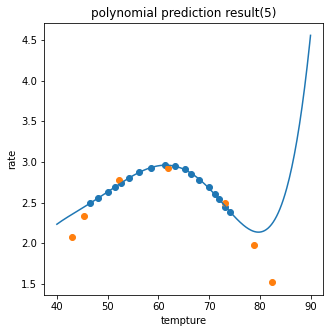

In [31]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_5_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.title('polynomial prediction result(5)')
plt.xlabel('tempture')
plt.ylabel('rate')
plt.show()